<a href="https://colab.research.google.com/github/swleegit/Hongong_ML/blob/main/04_01%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNeighborsClassifer에서 확률
[데이터](https://bit.ly/fish_csv_data)  



In [1]:
#데이터프레임은 배열 변환이 쉽고 사이킷런과 호환성이 좋다.
#자체 통계와 그래프 메서드를 가지고 있다.
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head(50)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [2]:
print(pd.value_counts(fish['Species']))
print(pd.unique(fish['Species'])) #알파벳, 개수 순서 아님
                                  #fish정렬상태에서 차례로 읽은 것 

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[[	'Weight',	'Length',	'Diagonal',	'Height',	'Width']].to_numpy()

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(fish_input, fish_target, random_state = 42)

In [7]:
#KNeighborsClassifier이니까 전처리과정이 필수 (거리기반 베이스니까)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(train_scaled, train_target)
print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))

0.8907563025210085
0.85


- species에는 여러개의 클래스가 있으니 다중분류(multi-class classification)
- 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 편리하게도 문자열로 된 타깃값을 그대로 사용할 수 있다.
- 이때 species의 순서를 아는 것이 중요한데
타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순서로 매겨진다.
- pd.unique(fish['Species'])의 순서랑 다르다는 것!
- 정렬된 타깃값은 classes_ 속성에 저장되어있다.

In [9]:
print(knn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
#타깃값을 문자열로 해놨으면 predict의 결과도 문자열 
print(knn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
#분류기는 모두 그것의 근거인 확률값을 가지고 있다.
#해당 메소드는 predict_proba() : 샘플당 클래스별 확률값을 반환

#np.round()는 기본적으로 소수점 첫째 자리에서 반올림하는데,
#decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다.

import numpy as np 
proba = knn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

#열의 순서는 .classes_의 순서로 알면된다.
#KNeighborsClassifier은 3개의 이웃중 몇개로 확률을 나타낸다.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [12]:
#이 확률이 맞는지 직접확인해보자.
#기본적으로 거리와 index를 반환하는 kneighbors()메서드의 입력은 2차원 배열이어야한다.
#이를 위해 넘파이 배열의 슬라이싱 연산자를 사용 : 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어진다.

#여기서는 거리값이 필요없으니 억제를 하면 

indexes = knn.kneighbors(test_scaled[3:4], return_distance = False)
print(train_target[indexes])

#훈련데이터가 저장(학습)되어 있고 거기에 test샘플을 놓았을 때
#근처 3개 훈련데이터의 index를 알려주는 것이고
#그 근처 훈련데이터의 target 값을 알고 싶은거니 train_target[indexes]

[['Roach' 'Perch' 'Perch']]


# 로지스틱 회귀(LogisticRegression)
- 로지스틱 회귀는 이름은 회귀이지만 분류 모델이다.

- 선형 회귀와 동일하게 선형 방정식을 학습한다.

<img src = "https://drive.google.com/uc?id=1K1aqL96y3E55kzxvDFP7BSUhIiBa0xpG">

- 확률로 분류를 시도하려면 확률은 0~1 사이의 값이 되어야함.

- 그래서 z값이 아주 큰 음수 일 때 0이되고 아주 큰 양수일 때 1이 되도록 바꿔서 처리를 해야함. 

- 시그모이드함수(sigmoid function)=로지스틱회귀(logistic function)을 사용하면 가능하다. (=z를 0~1 사이의 확률값으로 변환가능하다.

<img src = "https://drive.google.com/uc?id=15zIelkXh3eqzPg9mORRos6EGcPYqEiQM">


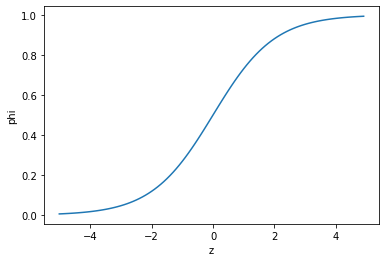

In [13]:
#해당 그래프를 직접 그려보자.

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5 , 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [14]:
#이진분류에서 로지스틱회귀
#시그모이드 함수값이 0.5보다 크면 양성클래스(1), 0.5보다 작으면 음성클래스(0)
#0.5면 음성클래스로 추측한다.


# 불리언 인덱싱(boolean indexing)
- numpy, dataframe은 True, False 값을 전달하여 행을 선택할 수 있다.
- 행번호로 행을 선택할 수 있듯이 모든 행에 대해 True, False를 지정하여 True인 행을 뽑아낼 수 있다.
- 즉 어떤 특정 조건을 만족하는 행을 뽑을 수 있다.


In [15]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E']) #리스트는 불리언 인덱싱이 안됨 
print(char_arr[[True, False, True, False, False]]) #이중괄호


['A' 'C']


In [16]:
#이진분류를 위해 bream , smelt만 골라오자 
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes] #[[]]
target_bream_smelt = train_target[bream_smelt_indexes]


In [17]:
#로지스틱회귀는 선형모델이므로 sklearn.linear_model에 있다.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [18]:
#LogisticRegression도 분류모델이기 때문에 predict_proba()를 제공한다.
print(lr.predict_proba(train_bream_smelt[:5]))


[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [19]:
#이진분류에서 첫번째 열이 음성(0) 두번째 열이 양성(1)
#어떤게 양성이고 음성임?
#사이킷런에서는 알파벳 순서로 class를 배치한다.
print(lr.classes_)

#여기서는 smelt가 양성


['Bream' 'Smelt']


- 위의 표를 해석하면 음성일 확률이 왼쪽을 읽으면 되고 1 - 그 확률이 오른쪽 양성일 확률, 높은 값이 예측 클래스값이다.

- decision_function을 통해서 확률로 변환되기 전에 z값을 알 수가 있는데 이 때 z값은 양성에 대한 z값이다.

- 문자열로 클래스로 나눈경우 내가 어떤 것이 목표(양성)인지 알면 구분하는 것은 전혀 문제되지 않지만, 만약 양성클래스의 z 값만 따로 알고 싶은데 알파벳 순서때문에 양성음성이 뒤집히면 귀찮아진다.  
- 이럴때는 양성클래스를 1로 지정하여 양성에 대한 z 값을 바로 얻을수록 변환하는것이 좋다.

In [20]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [25]:
#양성(smelt) z 값 출력 
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [26]:
#해당 z값을 시그모이드 함수에 대입하면 양성(smelt)에 대한 확률을 얻을 수 있다.
#np.exp 대신에 expit함수를 사용하자

from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


# 로지스틱 회귀로 다중 분류 수행하기
- 로지스틱회귀는 기본적으로 반복적인 알고리즘을 사용한다.

- max_iter로 반복횟수를 조정할 수 있다.

- LogisticRegression은 기본적으로 릿지회귀와 같이 계수의 제곱으로 규제를 한다.  
이러한 규제를 L2라고 한다.

- 로지스틱회귀에서는 C(기본값 = 1)로 규제의 정도를 조절하며 C가 클수록 규제는 작아지고 W 값은 커지게 된다. (alpha와 반대)

- solver 매개변수에서 사용할 알고리즘을 선택할 수 있다.

  - 기본값은 'lbfgs'
  - sag : 확률적 평균 경사 하강법으로 특성과 샘플 수가 많을 때 성능은 빠르고 좋다.
  - saga : sag의 개선 버전

- penalty 매개변수에서 l2(릿지) l1(라쏘) 선택 가능하다. 기본값이 l2임 기본적으로 규제가 있음.



In [27]:
lr = LogisticRegression(C = 20, max_iter = 1000) #L2규제, 계수가 사라지지 않음
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [28]:
print(lr.predict(test_scaled[:5]))


['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [29]:
#7개의 클래스에 대한 샘플 5개의 각각의 확률 
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [30]:
#각 열의 확률이 어떤 클래스에 대한 확률인가?
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [31]:
print(lr.coef_.shape, lr.intercept_.shape)
#계수 7행 5열 클래스 7개니까 선형식 7개, 특성은 5개니까 미지수 5개

(7, 5) (7,)


# softmax
- 이진분류에서는 시그모이드 함수를 이용해 z를 0과 1 사이의 값으로 변환 
- 다중분류는 이와 달리 소프트맥스 함수를 사용하여 여러개의 선형방정식의 출력값을 0과 1 사이로 압축하고 전체합이 1이 되도록 만든다.
- 이를 위해 지수함수를 사용하기 때문에 정규화된 지수 함수라고도 부른다.


In [32]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

#5개의 샘플, 클래스는 7개, 선형식 7개, 각 샘플당 각 클래스 선형식에 대입한 z값을 반환
#당연히 각 z 값을 소프트맥스 함수를 취하면 위의 확률과 같게 나오게 된다.

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [33]:
from scipy.special import softmax
proba = softmax(decision, axis = 1) #행 기준 확률을 구한다. 각 샘플별로 
                                    #만약 axis를 지정하지 않으면 전체 35개 데이터에 대한 softmax 결과값
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


로지스틱회귀 설명

<img src = "https://drive.google.com/uc?id=1bhYyNkz9NUTn7kLppmdmmitJ-YI3eArA">



참고 : 로지스틱회귀 설명
(책 "파이썬 라이브러리를 활용한 머신러닝") -96p  

<img src = "https://drive.google.com/uc?id=1-mXXBYsSM3irggueLtTxy0fekUGnKUN0">